# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [2]:
N = 25 # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [4]:
## Задание 1

from sklearn.base import BaseEstimator, ClusterMixin

class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    def _closest(self):
        a, b = np.unravel_index(self.dist_between_clusters.argmin(),
                        (len(self.uniques), len(self.uniques)))
        return a, b, self.dist_between_clusters[a, b]
    
                
    def _merge(self, a, b):
        mask = range(len(self.uniques))
        mask.remove(b)
        b_dist = self.dist_between_clusters[b][mask]
        self.dist_between_clusters = self.dist_between_clusters[np.ix_(mask, mask)]
        if b < a:
            a -= 1
        count_a = (self.labels == self.uniques[a]).sum()
        count_b = (self.labels == self.uniques[b]).sum()
        if self.linkage == "average":    
            self.dist_between_clusters[a] = self.dist_between_clusters[:, a] =\
            (b_dist * count_b + self.dist_between_clusters[a] * count_a) / (count_a + count_b)
        elif self.linkage == "single":
            self.dist_between_clusters[a] = self.dist_between_clusters[:, a] =\
            np.minimum(b_dist, self.dist_between_clusters[a])
            self.dist_between_clusters[a][a] = np.inf
        elif self.linkage == "complete":
            self.dist_between_clusters[a] = self.dist_between_clusters[:, a] =\
            np.maximum(b_dist, self.dist_between_clusters[a])
        
        self.labels[self.labels == self.uniques[b]] = self.uniques[a]
    
    def __init__(self, k=1, metric="euclidian", linkage="single"):
        linkage_choices = ["single", "complete", "average"]
        if k < 1:
            raise ValueError("number of clusters can't be less than 1")
        if linkage not in linkage_choices:
            raise KeyError('invalid linkage')
        self.k = k
        self.metric = metric
        self.linkage = linkage
    
    def fit(self, x, y=None):
        self.x_len = x.shape[0]
        self.x = x
        self.labels = np.arange(self.x_len)
        self.dist_between_clusters = np.empty((self.x_len, self.x_len))
        
        self.hierarchy = np.empty((self.x_len - self.k, 4))
        self.new_groups = {}
        for i in xrange(self.x_len):
            self.dist_between_clusters[i] = ((self.x - self.x[i]) ** 2).sum(axis=1)
            self.dist_between_clusters[i][i] = np.inf 
        for i in xrange(self.x_len - self.k):
            self.uniques = sorted(set(self.labels))
            a, b, dist = self._closest()
            self._merge(a, b)
            a, b = self.uniques[a], self.uniques[b]
            self.hierarchy[i] = [self.new_groups.get(a, a), self.new_groups.get(b, b), dist, (self.labels == a).sum()]
            self.new_groups[a] = self.x_len + i
        return self
    
    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        return self.labels
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

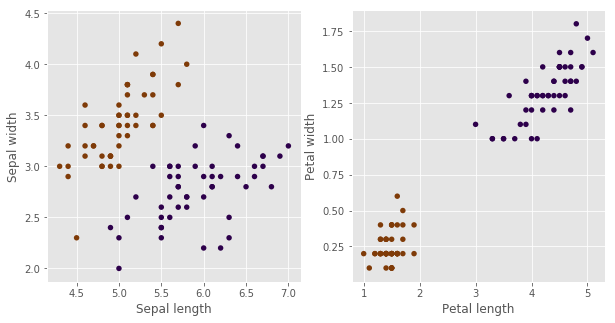

In [5]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [6]:
%%timeit -n100
pred_iris = Clustering(k=2, linkage='average').fit_predict(x_iris)

100 loops, best of 3: 11.1 ms per loop


In [8]:
%%timeit -n100
pred_iris = Clustering(k=2, linkage='complete').fit_predict(x_iris)

100 loops, best of 3: 10 ms per loop


In [10]:
%%timeit -n100
pred_iris = Clustering(k=2, linkage='single').fit_predict(x_iris)

100 loops, best of 3: 10.1 ms per loop


In [276]:
for linkage in ['single', 'average', 'complete']:    
    pred_iris = Clustering(k=2, linkage=linkage).fit_predict(x_iris)
    print "Adjusted Rand index for iris with {} linkage is: %.2f".format(linkage) %\
    smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris with single linkage is: 1.00
Adjusted Rand index for iris with average linkage is: 1.00
Adjusted Rand index for iris with complete linkage is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

Я возьму Silhoutte для поиска лучшего места отсечения дендрограммы, а качество самого разбиения будем оценивать коэффициентом кофенетической корреляции.

In [12]:
## Задание 2
def quality(x, clust):
    """
    Silhoutte
    """
    uniques = sorted(set(clust))
    if len(uniques) == 1:
        return
    result = 0
    for i, element in enumerate(x):
        a = (((x[clust == clust[i]] - element) ** 2).sum(axis=1) ** 0.5).mean()
        b = np.inf
        for j in uniques:
            if j != clust[i]:
                b = np.minimum(b, (((x[clust == clust[j]] - element) ** 2).sum(axis=1) ** 0.5).mean())
        result += (b - a) / np.maximum(a, b)
    return result / x.shape[0]


In [24]:
def CophCorr(x, hierarchy):
    coph_dist = np.zeros((x.shape[0], x.shape[0]))
    euclid_dist = np.zeros((x.shape[0], x.shape[0]))
    x_size = x.shape[0]
    
    def find_next_clust(clust_id, merge_dict):
        if clust_id < x.shape[0]:
            return [clust_id]
        [a, b] = merge_dict[clust_id]
        result = []
        result.extend(find_next_clust(a, merge_dict))
        result.extend(find_next_clust(b, merge_dict))
        return result
    
    for i in xrange(x_size):
            euclid_dist[i] = (((x - x[i]) ** 2).sum(axis=1)) ** 0.5
    
    new_clusts_dict = {}
    for i, merge_clust in enumerate(hierarchy):
        [a, b, dist] = merge_clust[:3]
        a, b = int(a), int(b)
        new_clusts_dict[i + x.shape[0]] = [a, b]
        for j in find_next_clust(a, new_clusts_dict):
            for t in find_next_clust(b, new_clusts_dict):
                coph_dist[j][t] = coph_dist[t][j] = dist
            
    euclid_mean = euclid_dist.sum() / (x_size * (x_size - 1) / 2)
    coph_mean = coph_dist.sum() / (x_size * (x_size - 1) / 2)
    
    sum_1 = ((euclid_dist - euclid_mean) * (coph_dist - coph_mean)).sum() / 2
    sum_2 = ((euclid_dist - euclid_mean) ** 2).sum() / 2
    sum_3 = ((coph_dist - coph_mean) ** 2).sum() / 2
    
    coph_corr = sum_1 / (sum_2 * sum_3) ** 0.5
    return coph_corr


In [55]:
def print_qualities(x, n_clusts):
    ks = range(2, n_clusts)
    criteria = np.zeros(len(ks))
    fig, axes = pl.subplots(nrows=3, figsize=(8, 16))

    linkages = ['average', 'single', 'complete']
    for j, link in enumerate(linkages):
        for i, k in enumerate(ks):
            cls = Clustering(k=k, linkage=link)
            y = cls.fit_predict(x)
            criteria[i] = quality(x, y)
        cls = Clustering(linkage=link)
        cls.fit(x)
        coph_corr = CophCorr(x, cls.hierarchy)
        axes[j].plot(ks, criteria)
        coph_corr_str = "{0:.4f}".format(coph_corr)
        axes[j].set_title("{} linkage, CophCorr: {}".format(link, coph_corr_str))
        axes[j].set_ylabel("Silhoutte")
        axes[j].set_xlabel("Number of clusters")
        axes[j].grid(b=True)

    pl.show()

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

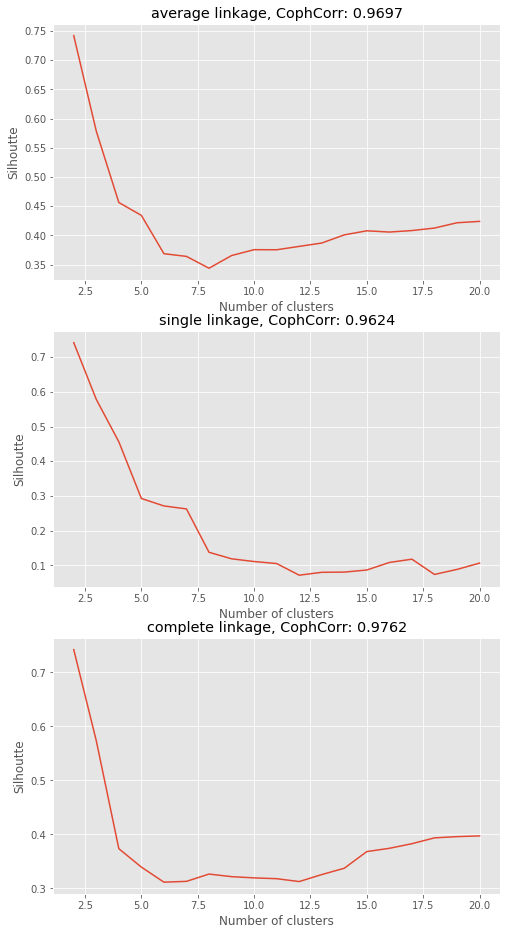

In [56]:
print_qualities(x_iris, 21)

In [26]:
## Задание 3
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE

In [28]:
df2 = pd.read_csv(r'C:\Users\Dima\Downloads\WDI_csv\WDIData.csv')

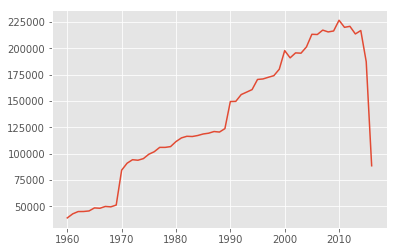

In [33]:
%matplotlib inline
dic = [(int(i), df2[i].notnull().sum()) for i in df2.columns[4: -1]]
plt.grid(b=True)
_ = plt.plot([i[0] for i in dic], [i[1] for i in dic])

В 2010 году больше данных -- возьмем его

In [286]:
total = df2.groupby(['Country Name', 'Indicator Name'])['2010'].agg(lambda x: x).unstack()
total = total[[i for i in total if total[i].isnull().sum() < 0.15 * total.shape[0]]]
total = total.iloc[[i for i in range(total.shape[0]) if total.iloc[i].isnull().sum() < 0.75 * total.shape[0]]]
total.shape

(244, 318)

В данных было много пропусков, после частичной очистки данных у нас осталось 244 страны и 318 параметров

In [287]:
#to solve problem with encoding
total.index = [i.replace('’', '') for i in total.index] 

Отнормируем данные и заполним пропуски

In [288]:
for i in total:
    norm = (total.loc[:, i] - total.loc[:, i].mean()) / total.loc[:, i].std()
    total.loc[:, i] = norm
total.fillna(0, inplace=True)

На графиках ниже видно, что complete linkage дает лучшую кофенетическую корреляцию и, соответстввенно, лучшую структуру иерархии. В дальнейшем будем использовать именно complete linkage. Также графики показывают переобучение модели: качество начинает постоянно расти после 20 кластеров.

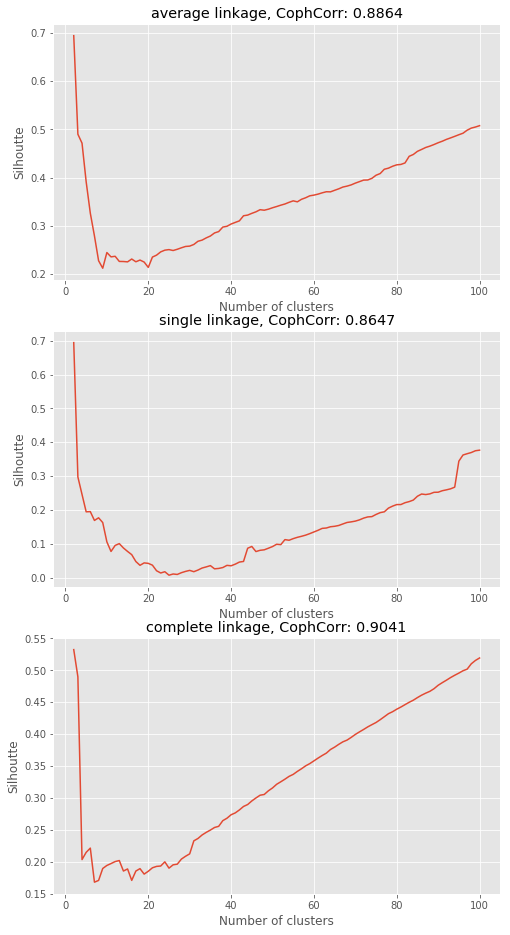

In [270]:
print_qualities(total.values, 101)

Поближе посмотрим на левую часть графиков

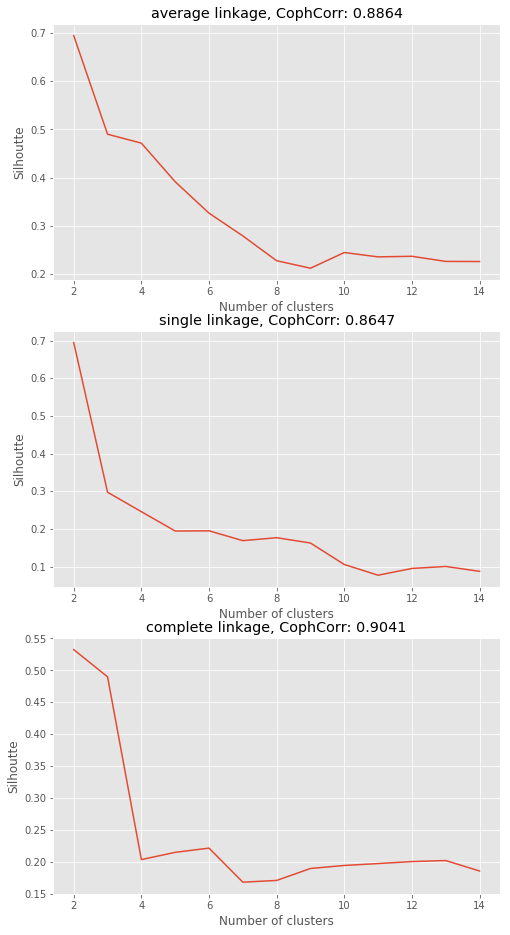

In [271]:
print_qualities(total.values, 15)

Чтобы понять, почему качество резко падает в начале, построим дендрограмму.

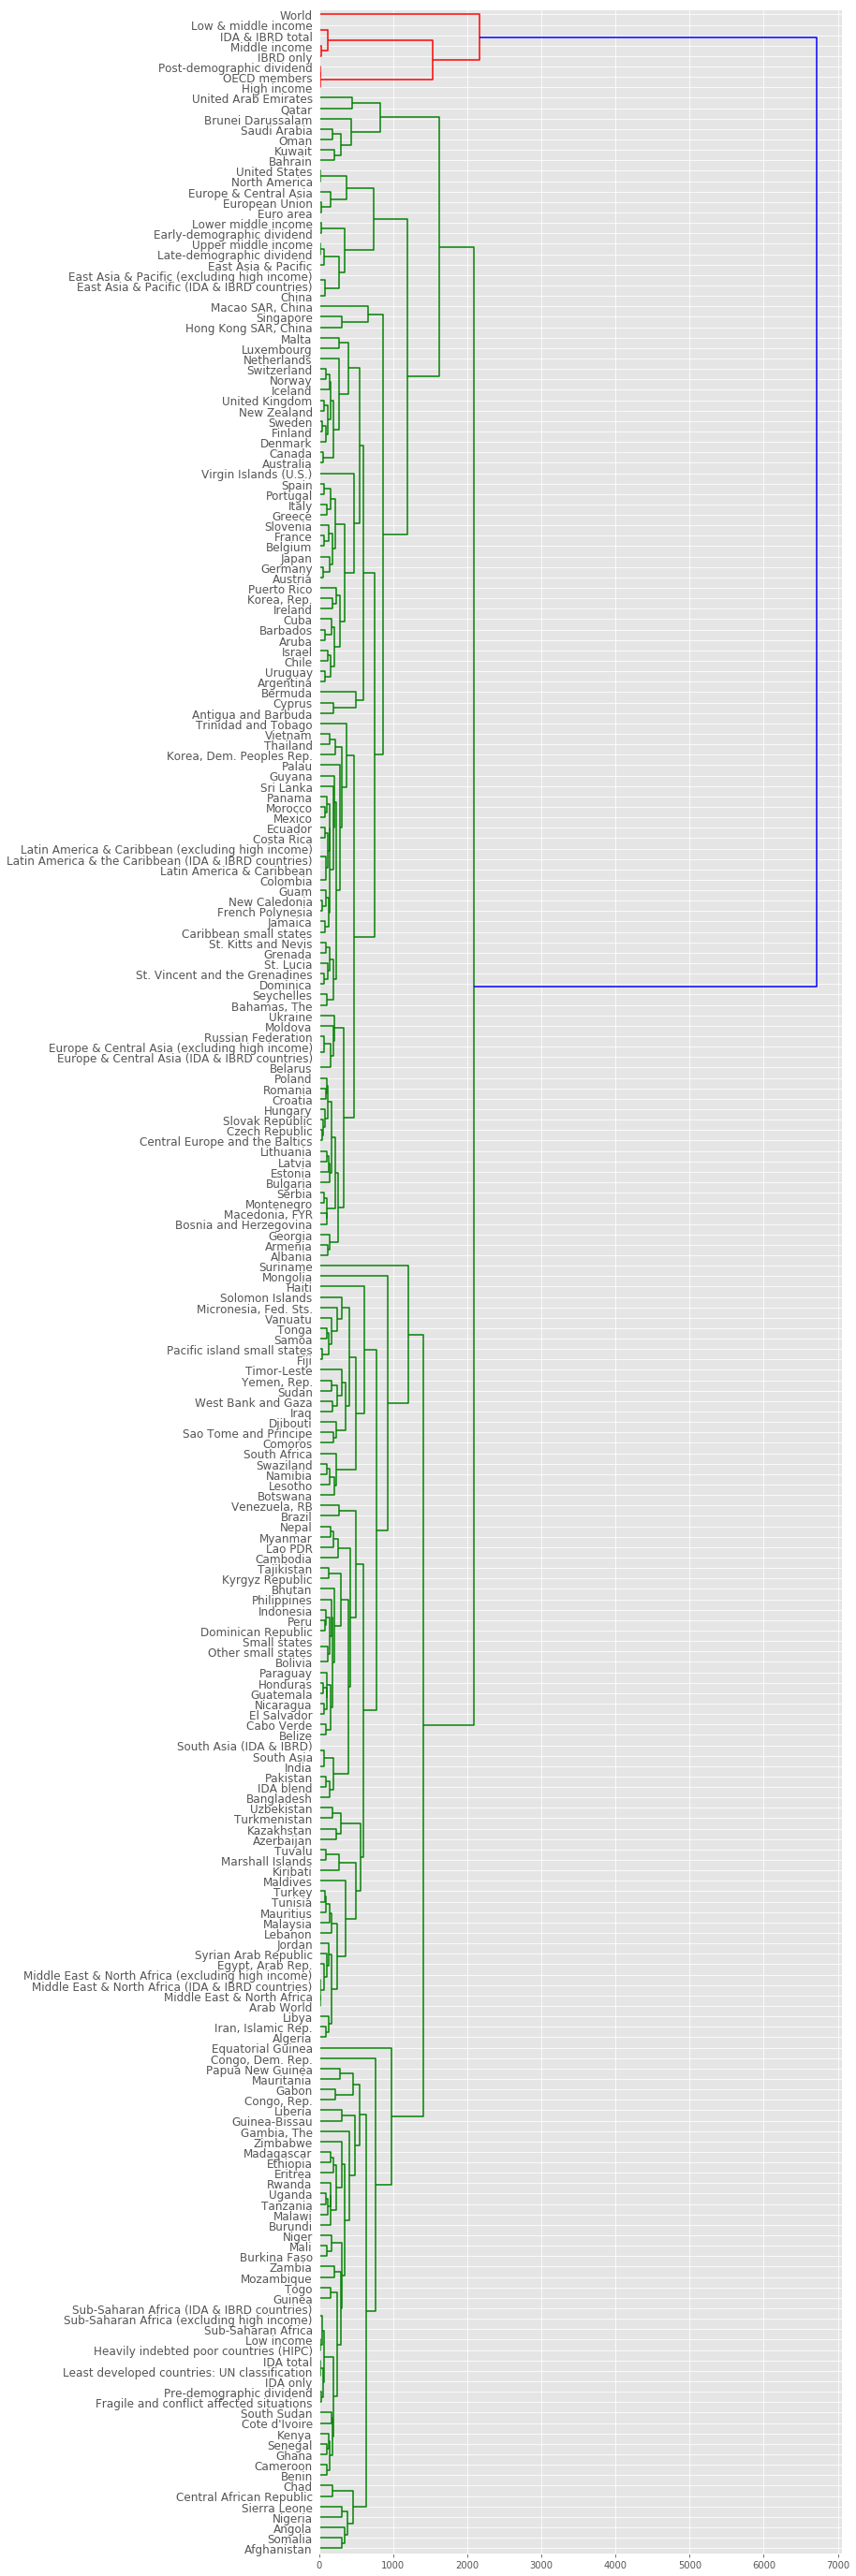

In [272]:
clust = Clustering(linkage="complete")
clust.fit_predict(total.values)
hierarchy = clust.hierarchy

fig, ax = plt.subplots(figsize=(10, 50))
dendrogram(hierarchy, truncate_mode=None, labels=total.index,
           orientation='right', leaf_font_size=12, show_contracted=True) 
plt.show()

В отдельную группу попали группы стран, такие как "World", "Low & middle income", "OECD members", "High income". Это становится очевидно, если посмотреть на колонки в исходных данных: там есть относительные значения, такие как ВВП на человека, а есть абсолютные, такие как "Total population", "Total area". И именно эти абсолютные значения будут гораздо выше у групп стран, что и выделяет их в отдельный кластер. А поскольку эти группы стран сильно выделяются и образуют яркий кластер, качество кластеризации будет самым высоким при 2-ух кластерах, что и было видно на графиках. Остальные кластеры отличаются не так сильно, и качество падает при повышении количества кластеров. Если нам нужно разбить больше, чем на 3 кластера, график качества complete linkage подсказывает значения: 4, 6, 13

Построим T-SNE для 13-ти кластеров

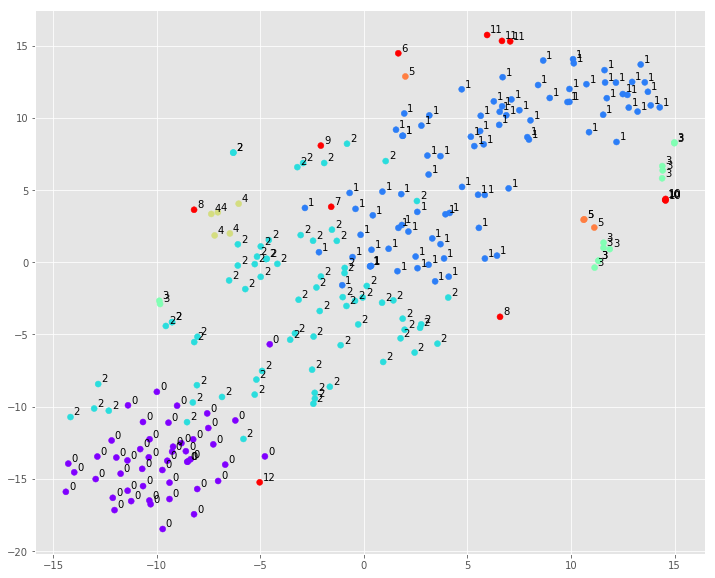

In [312]:
X = TSNE(n_components=2).fit_transform(total.values)

clust = Clustering(linkage="complete", k=13)
clust.fit_predict(total.values)
hierarchy = clust.hierarchy

plt.figure(figsize=(12, 10))
color_dict = {j: i for i, j in enumerate(set(clust.labels))}
colors_ = [color_dict[i] for i in clust.labels]
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=0, vmax=(max(colors_) / 2))

for j, i in enumerate(X):
    plt.annotate(xy=(i[0], i[1]), s=str(colors_[j]), xytext=((i[0] + 0.15, i[1] + 0.15)))
_ = plt.scatter(X.T[0], X.T[1], c=cmap(norm(colors_)))

In [314]:
for i, j in sorted(total.groupby(clust.labels), key=lambda x: color_dict[x[0]]):
    print 'Group label', color_dict[i], ': {} members'.format(j.shape[0])
    print ', '.join(j.index), '\n'

Group label 0 : 48 members
Afghanistan, Angola, Benin, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Eritrea, Ethiopia, Fragile and conflict affected situations, Gabon, Gambia, The, Ghana, Guinea, Guinea-Bissau, Heavily indebted poor countries (HIPC), IDA only, IDA total, Kenya, Least developed countries: UN classification, Liberia, Low income, Madagascar, Malawi, Mali, Mauritania, Mozambique, Niger, Nigeria, Papua New Guinea, Pre-demographic dividend, Rwanda, Senegal, Sierra Leone, Somalia, South Sudan, Sub-Saharan Africa, Sub-Saharan Africa (IDA & IBRD countries), Sub-Saharan Africa (excluding high income), Tanzania, Togo, Uganda, Zambia, Zimbabwe 

Group label 1 : 89 members
Albania, Antigua and Barbuda, Argentina, Armenia, Aruba, Australia, Austria, Bahamas, The, Barbados, Belarus, Belgium, Bermuda, Bosnia and Herzegovina, Bulgaria, Canada, Caribbean small states, Central Europe and the Baltics, Chile, Colombia, Costa

## Задание 4
На графике TSNE видно, что страны действительно группируются по цветам, но для иерархической кластеризации все же больше подходит дендрограмма. Видно, что многие географически близкие страны оказались в отдельных группах иерархии. Также видна категоризация по степени экономического развития.

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.